# Naive Bayes
## Salary_data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# load the train dataset
df_train = pd.read_csv(r'C:\Users\PRANAV\Desktop\lms\SVM\SalaryData_Train.csv')


In [3]:
# load the test dataset
df_test = pd.read_csv(r'C:\Users\PRANAV\Desktop\lms\SVM\SalaryData_Test.csv')

In [4]:
df_train.head()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df_train.shape

(30161, 14)

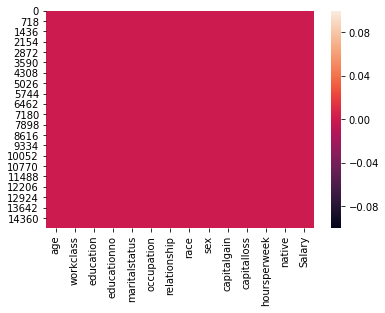

In [6]:
sns.heatmap(df_test.isnull())

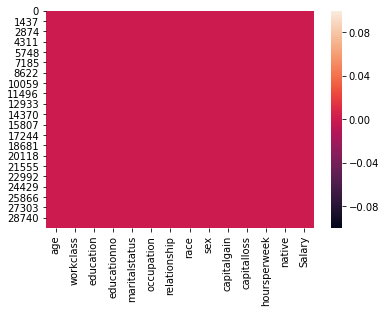

In [7]:
sns.heatmap(df_train.isnull())

(array([1.2790e+03, 2.4990e+03, 0.0000e+00, 2.2285e+04, 0.0000e+00,
        9.4300e+02, 2.0670e+03, 0.0000e+00, 1.0740e+03, 1.4000e+01]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

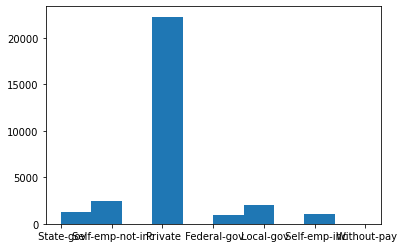

In [8]:
plt.hist(x=df_train['workclass'])

In [9]:
df_test.drop('workclass',axis=1,inplace=True)
df_train.drop('workclass',axis=1,inplace=True)

(array([27776.,   817.,   465.,   147.,   128.,   228.,   270.,   119.,
           91.,   120.]),
 array([ 0. ,  3.9,  7.8, 11.7, 15.6, 19.5, 23.4, 27.3, 31.2, 35.1, 39. ]),
 <a list of 10 Patch objects>)

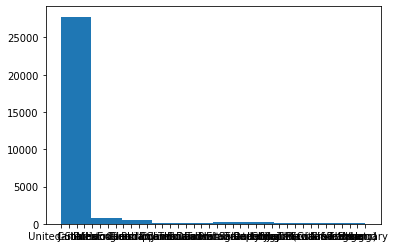

In [10]:
plt.hist(x=df_train['native'])

In [11]:
df_test.drop('native',axis=1,inplace=True)
df_train.drop('native',axis=1,inplace=True)

(array([25932.,     0.,  2817.,     0.,     0.,   895.,     0.,   286.,
            0.,   231.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

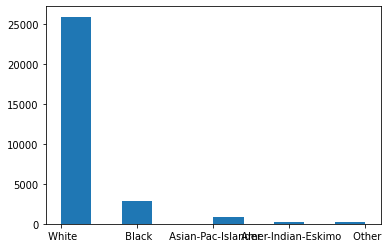

In [12]:
plt.hist(x=df_train['race'])

In [13]:
df_test.drop('race',axis=1,inplace=True)
df_train.drop('race',axis=1,inplace=True)

In [14]:
df_test.drop('capitalloss',axis=1,inplace=True)
df_train.drop('capitalloss',axis=1,inplace=True)

In [15]:
len(df_train[df_train['capitalgain'] ==0])

27623

In [16]:
df_test.drop('capitalgain',axis=1,inplace=True)
df_train.drop('capitalgain',axis=1,inplace=True)

In [18]:
# LabelEncoder to both dataset
from sklearn.preprocessing import LabelEncoder
le_train = LabelEncoder()
df_train['Salary'] = le_train.fit_transform(df_train['Salary'])

df_train['education'] = le_train.fit_transform(df_train['education'])
df_train['maritalstatus'] = le_train.fit_transform(df_train['maritalstatus'])
df_train['occupation'] = le_train.fit_transform(df_train['occupation'])
df_train['relationship'] = le_train.fit_transform(df_train['relationship'])

df_train['sex'] = le_train.fit_transform(df_train['sex'])

le_test = LabelEncoder()
df_test['Salary'] = le_test.fit_transform(df_test['Salary'])

df_test['education'] = le_test.fit_transform(df_test['education'])
df_test['maritalstatus'] = le_test.fit_transform(df_test['maritalstatus'])
df_test['occupation'] = le_test.fit_transform(df_test['occupation'])
df_test['relationship'] = le_test.fit_transform(df_test['relationship'])

df_test['sex'] = le_test.fit_transform(df_test['sex'])


In [19]:
df_train

,age,education,educationno,maritalstatus,occupation,relationship,sex,hoursperweek,Salary
0,39,9,13,4,0,1,1,40,0
1,50,9,13,2,3,0,1,13,0
2,38,11,9,0,5,1,1,40,0
3,53,1,7,2,5,0,1,40,0
4,28,9,13,2,9,5,0,40,0
...,...,...,...,...,...,...,...,...,...
30156,27,7,12,2,12,5,0,38,0
30157,40,11,9,2,6,0,1,40,1
30158,58,11,9,6,0,4,0,40,0
30159,22,11,9,4,0,3,1,20,0


In [20]:
from sklearn.ensemble import IsolationForest

In [21]:
clf_train = IsolationForest(random_state=10,contamination=.01)
clf_train.fit(df_train)
clf_test = IsolationForest(random_state=10,contamination=.01)
clf_test.fit(df_test)

IsolationForest(contamination=0.01, random_state=10)

In [22]:
# predictions
y_pred_outliers_train = clf_train.predict(df_train)
y_pred_outliers_test = clf_test.predict(df_test)


In [23]:
df_train['anomaly']=clf_train.predict(df_train)
df_test['anomaly']=clf_test.predict(df_test)

In [24]:
type(df_train[df_train['anomaly']==-1].index.tolist())

list

In [25]:
# for train data
for i in df_train[df_train['anomaly']==-1].index.tolist():
    df_train.drop(i,axis=0,inplace=True)       

In [26]:
# for test data
for i in df_test[df_test['anomaly']==-1].index.tolist():
    df_test.drop(i,axis=0,inplace=True)

In [27]:
# splitting X and y into training and testing sets
X_train = df_train.drop('Salary',axis=1)
y_train = df_train['Salary']
X_test = df_test.drop('Salary',axis=1)
y_test = df_test['Salary']


In [28]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [29]:
# making predictions on the testing set
y_pred = model.predict(X_test)

In [30]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 77.91267019920853


In [31]:
from sklearn.naive_bayes import MultinomialNB
model_mb = MultinomialNB()
model_mb.fit(X_train,y_train)

MultinomialNB()

In [32]:
pred = model_mb.predict(X_test)

In [33]:
print("Multinomial Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, pred)*100)

Multinomial Naive Bayes model accuracy(in %): 72.13092762760749
